## Introduction to Probability and Statistics
## Assignment

In this assignment, we will use the dataset of diabetes patients taken [from here](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

url = 'https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt'
df = pd.read_csv(url, delimiter='\t')

df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135



In this dataset, columns as the following:
* Age and sex are self-explanatory
* BMI is body mass index
* BP is average blood pressure
* S1 through S6 are different blood measurements
* Y is the qualitative measure of disease progression over one year

Let's study this dataset using methods of probability and statistics.

### Task 1: Compute mean values and variance for all values

In [2]:
# Memperoleh nilai mean dan var dari setiap kolom
mean = df.mean()
var = df.var()

# Menggabungkan kedua data tersebut
result = pd.concat([mean, var], axis=1)
# Mengubah nama kolom
result.columns = ["mean", "variance"]

# Menampilkan hasil
print(result)

           mean     variance
AGE   48.518100   171.846610
SEX    1.468326     0.249561
BMI   26.375792    19.519798
BP    94.647014   191.304401
S1   189.140271  1197.717241
S2   115.439140   924.955494
S3    49.788462   167.293585
S4     4.070249     1.665261
S5     4.641411     0.272892
S6    91.260181   132.165712
Y    152.133484  5943.331348


### Task 2: Plot boxplots for BMI, BP and Y depending on gender

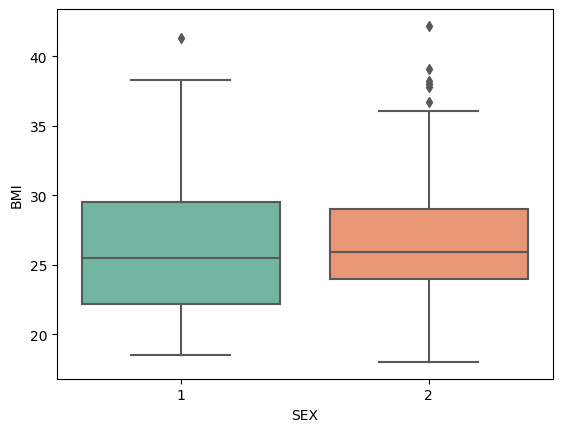

In [21]:
# Menampilkan boxplot dari kolom BMI berdasarkan SEX dari data df dengan orientasi vertikal menggunakan tema palet Set2
ax = sns.boxplot(y = "BMI", x = "SEX",data=df, orient="v", palette="Set2")

Berdasarkan plot Boxplot tersebut, gender 2 memiliki lebih banyak outlier daripada gender 1 pada variabel BMI

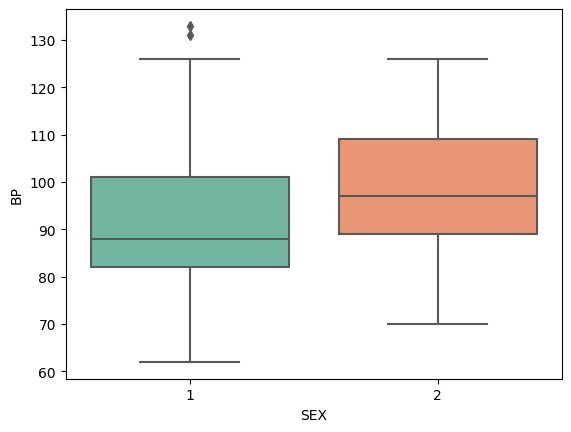

In [22]:
# Menampilkan boxplot dari kolom BP berdasarkan SEX dari data df dengan orientasi vertikal menggunakan tema palet Set2
ax = sns.boxplot(y = "BP", x = "SEX",data=df, orient="v", palette="Set2")

Berdasarkan pada plot boxplot tersebut, gender 1 memiliki 2 outlier pada variabel BP, sedangkan pada gender 2 tidak terdapat outlier

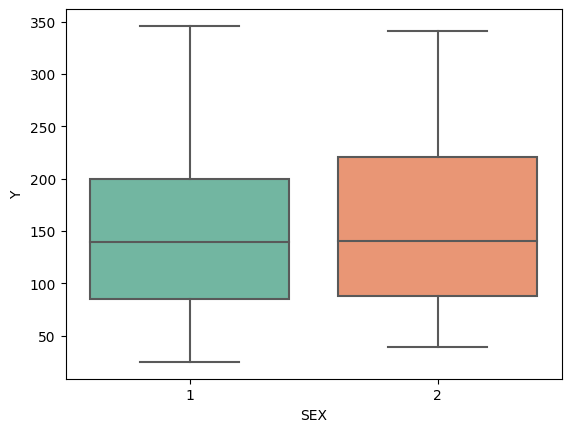

In [23]:
# Menampilkan boxplot dari kolom Y berdasarkan SEX dari data df dengan orientasi vertikal menggunakan tema palet Set2
ax = sns.boxplot(y = "Y", x = "SEX",data=df, orient="v", palette="Set2")

Berdasarkan plot boxplot tersebut, tidak ditemukan adanya outlier pada variabel Y baik pada gender 1 maupun gender 2

### Task 3: What is the the distribution of Age, Sex, BMI and Y variables?

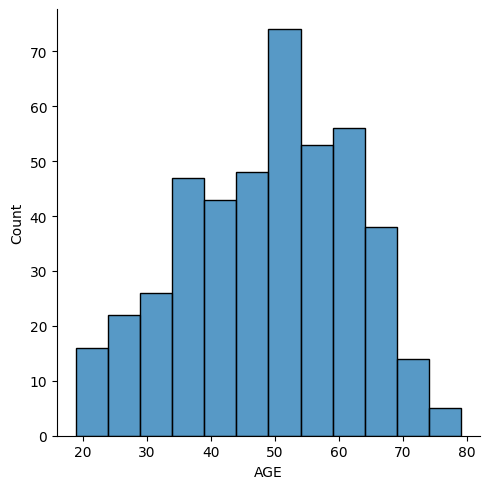

In [3]:
# The distribution of Age
sns.displot(df['AGE'])

Variabel "AGE" memiliki kecenderungan mirip dengan distribusi Normal

In [59]:
# Pengujian formal distribusi
from scipy import stats

# Pendefinisian distribusi yang akan diujikan
dist = ['beta', 'chi2', 'expon', 'f', 'gamma', 'logistic', 'norm', 'unif']

# Membuat wadah untuk menampung nilai p-value
p_value = []

# Pengujian formal distribusi dengan looping dari setiap distribusi pada array dist
for i in dist:
    # Menambahkan nilai pvalue dari hasil pengujian kolmogorov-smirnov ke dalam wadah p_value
    p_value.append(stats.kstest(df['AGE'], dist).pvalue)

# if p-value < criteria, then reject H0, else accept H0
criteria = 0.05
status = ['Reject H0' if p < criteria else 'Accept H0' for p in p_value]

# Membuat dataframe untuk menampilkan hasil pengujian
result = pd.DataFrame({'p-value': p_value, 'criteria': criteria, 'status': status}, index=dist)

# Menampilkan hasil pengujian
print(result)


               p-value  criteria     status
beta      5.105339e-17      0.05  Reject H0
chi2      5.105339e-17      0.05  Reject H0
expon     5.105339e-17      0.05  Reject H0
f         5.105339e-17      0.05  Reject H0
gamma     5.105339e-17      0.05  Reject H0
logistic  5.105339e-17      0.05  Reject H0
norm      5.105339e-17      0.05  Reject H0
unif      5.105339e-17      0.05  Reject H0


Berdasarkan output tersebut, diperoleh bahwa variabel 'AGE' tidak mengikuti distribusi 'beta', 'chi2', 'expon', 'f', 'gamma', 'logistic', 'norm', 'unif' karena memiliki nilai p-value yang dibawah dari alpha (0.05)

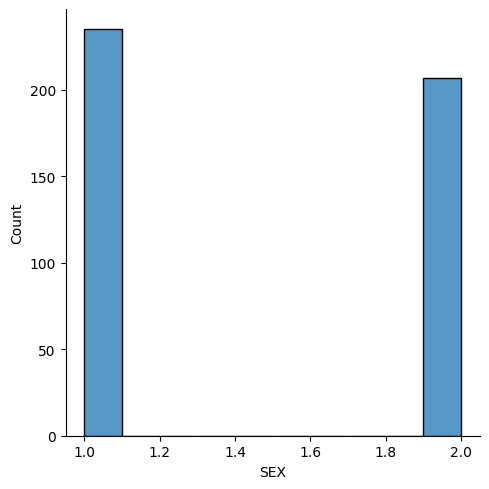

In [6]:
# The distribution of Sex
sns.displot(df['SEX'])

Variabel "SEX" pada data memiliki pola distribusi yang tidak terdistribusi secara normal, tetapi terlihat seperti terdistribusi secara seragam

In [60]:
# Pengujian formal distribusi
from scipy import stats

# Pendefinisian distribusi yang akan diujikan
dist = ['beta', 'chi2', 'expon', 'f', 'gamma', 'logistic', 'norm', 'unif']

# Membuat wadah untuk menampung nilai p-value
p_value = []

# Pengujian formal distribusi dengan looping dari setiap distribusi pada array dist
for i in dist:
    # Menambahkan nilai pvalue dari hasil pengujian kolmogorov-smirnov ke dalam wadah p_value
    p_value.append(stats.kstest(df['SEX'], dist).pvalue)

# if p-value < criteria, then reject H0, else accept H0
criteria = 0.05
status = ['Reject H0' if p < criteria else 'Accept H0' for p in p_value]

# Membuat dataframe untuk menampilkan hasil pengujian
result = pd.DataFrame({'p-value': p_value, 'criteria': criteria, 'status': status}, index=dist)

# Menampilkan hasil pengujian
print(result)


               p-value  criteria     status
beta      5.105339e-17      0.05  Reject H0
chi2      5.105339e-17      0.05  Reject H0
expon     5.105339e-17      0.05  Reject H0
f         5.105339e-17      0.05  Reject H0
gamma     5.105339e-17      0.05  Reject H0
logistic  5.105339e-17      0.05  Reject H0
norm      5.105339e-17      0.05  Reject H0
unif      5.105339e-17      0.05  Reject H0


Berdasarkan output tersebut, diperoleh bahwa variabel 'SEX' tidak mengikuti distribusi 'beta', 'chi2', 'expon', 'f', 'gamma', 'logistic', 'norm', 'unif' karena memiliki nilai p-value yang dibawah dari alpha (0.05)

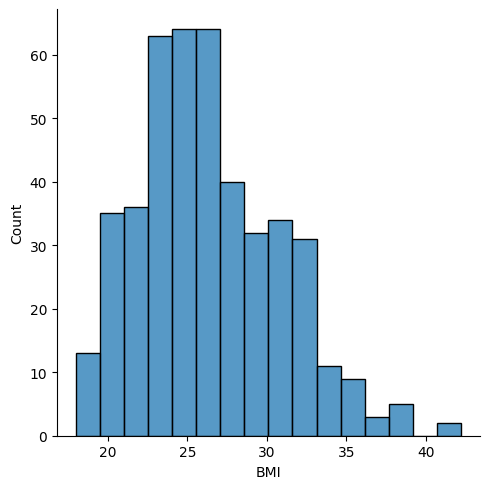

In [7]:
# The distribution of BMI
sns.displot(df['BMI'])

Variabel "BMI" memiliki kecenderungan mirip dengan distribusi Normal

In [61]:
# Pengujian formal distribusi
from scipy import stats

# Pendefinisian distribusi yang akan diujikan
dist = ['beta', 'chi2', 'expon', 'f', 'gamma', 'logistic', 'norm', 'unif']

# Membuat wadah untuk menampung nilai p-value
p_value = []

# Pengujian formal distribusi dengan looping dari setiap distribusi pada array dist
for i in dist:
    # Menambahkan nilai pvalue dari hasil pengujian kolmogorov-smirnov ke dalam wadah p_value
    p_value.append(stats.kstest(df['BMI'], dist).pvalue)

# if p-value < criteria, then reject H0, else accept H0
criteria = 0.05
status = ['Reject H0' if p < criteria else 'Accept H0' for p in p_value]

# Membuat dataframe untuk menampilkan hasil pengujian
result = pd.DataFrame({'p-value': p_value, 'criteria': criteria, 'status': status}, index=dist)

# Menampilkan hasil pengujian
print(result)


               p-value  criteria     status
beta      5.105339e-17      0.05  Reject H0
chi2      5.105339e-17      0.05  Reject H0
expon     5.105339e-17      0.05  Reject H0
f         5.105339e-17      0.05  Reject H0
gamma     5.105339e-17      0.05  Reject H0
logistic  5.105339e-17      0.05  Reject H0
norm      5.105339e-17      0.05  Reject H0
unif      5.105339e-17      0.05  Reject H0


Berdasarkan output tersebut, diperoleh bahwa variabel 'BMI' tidak mengikuti distribusi 'beta', 'chi2', 'expon', 'f', 'gamma', 'logistic', 'norm', 'unif' karena memiliki nilai p-value yang dibawah dari alpha (0.05)

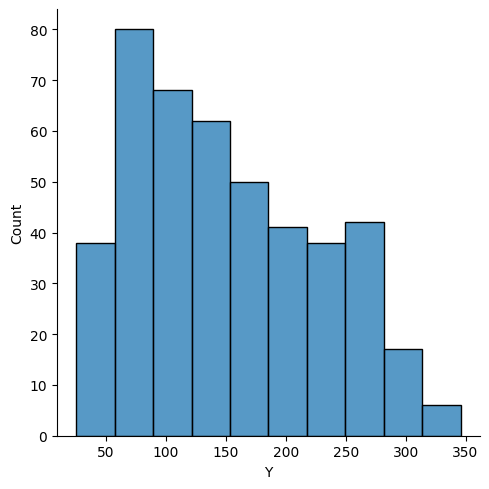

In [8]:
# The distribution of BMI
sns.displot(df['Y'])

In [62]:
# Pengujian formal distribusi
from scipy import stats

# Pendefinisian distribusi yang akan diujikan
dist = ['beta', 'chi2', 'expon', 'f', 'gamma', 'logistic', 'norm', 'unif']

# Membuat wadah untuk menampung nilai p-value
p_value = []

# Pengujian formal distribusi dengan looping dari setiap distribusi pada array dist
for i in dist:
    # Menambahkan nilai pvalue dari hasil pengujian kolmogorov-smirnov ke dalam wadah p_value
    p_value.append(stats.kstest(df['Y'], dist).pvalue)

# if p-value < criteria, then reject H0, else accept H0
criteria = 0.05
status = ['Reject H0' if p < criteria else 'Accept H0' for p in p_value]

# Membuat dataframe untuk menampilkan hasil pengujian
result = pd.DataFrame({'p-value': p_value, 'criteria': criteria, 'status': status}, index=dist)

# Menampilkan hasil pengujian
print(result)

               p-value  criteria     status
beta      5.105339e-17      0.05  Reject H0
chi2      5.105339e-17      0.05  Reject H0
expon     5.105339e-17      0.05  Reject H0
f         5.105339e-17      0.05  Reject H0
gamma     5.105339e-17      0.05  Reject H0
logistic  5.105339e-17      0.05  Reject H0
norm      5.105339e-17      0.05  Reject H0
unif      5.105339e-17      0.05  Reject H0


Berdasarkan output tersebut, diperoleh bahwa variabel 'Y' tidak mengikuti distribusi 'beta', 'chi2', 'expon', 'f', 'gamma', 'logistic', 'norm', 'unif' karena memiliki nilai p-value yang dibawah dari alpha (0.05)